In [1]:
import xarray as xr

In [13]:
#df = xr.open_dataset("reprojected_output.nc")
df = xr.open_dataset("ims_20160501_latlon_NO-AR-CW_wtime.nc")


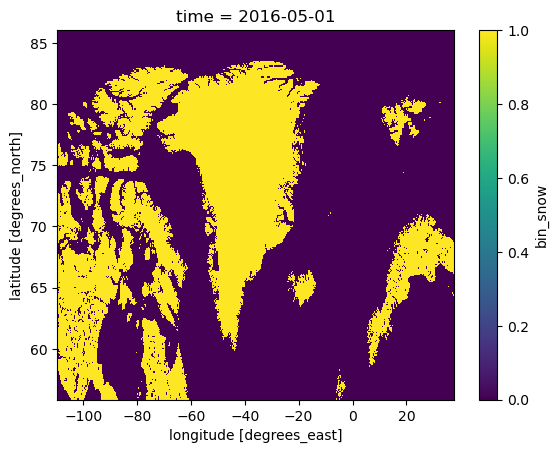

In [14]:
df["bin_snow"][0,:,:].plot()

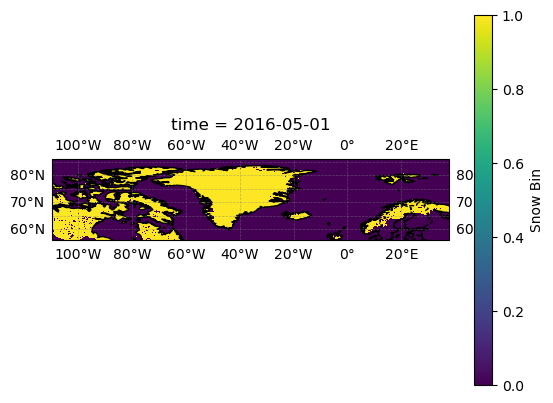

In [15]:
#ims = xr.open_dataset("../sample_data/resampled_IMS/resampled_snow_cover_20150501_CW.nc")

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming ims is your xarray dataset
# Example: ims = xr.open_dataset("your_file.nc")

# Select the variable and slice
data = df["bin_snow"][0, :, :]

# Create a plot with Cartopy
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="viridis", cbar_kwargs={"label": "Snow Bin"})

# Add country borders and coastlines
ax.add_feature(cfeature.BORDERS, linestyle="--", edgecolor="black")
ax.add_feature(cfeature.COASTLINE, edgecolor="black")

# Add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color="gray", alpha=0.5, linestyle="--")


In [3]:
lat_bounds = slice(55, 72)  # From 72°N to 55°N
lon_bounds = slice(5, 30)   # From 5°E to 30°E

# Subset the data for Scandinavia
scandinavia = df.sel(lat=lat_bounds, lon=lon_bounds)


In [7]:
scandinavia.variables

Frozen({'time': <xarray.IndexVariable 'time' (time: 1)>
array(['2016-05-01T00:00:00.000000000'], dtype='datetime64[ns]')
Attributes:
    CoordinateAxisType:  Time
    axis:                T
    comment:             This is the 00Z reference time. Note that products a...
    ioos_category:       Time
    long_name:           Centered Time
    standard_name:       time
    time_origin:         01-JAN-1970 00:00:00, 'lon': <xarray.IndexVariable 'lon' (lon: 250)>
array([ 5. ,  5.1,  5.2, ..., 29.7, 29.8, 29.9])
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X, 'lat': <xarray.IndexVariable 'lat' (lat: 0)>
array([], dtype=float64)
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y, 'snow_cover': <xarray.Variable (time: 1, lat: 0, lon: 250)>
[0 values with dtype=float32]
Attributes:
    standard_name:  area_type
    long_name:      IMS maps o

In [4]:
scandinavia["bin_snow"][0,:,:].plot()

TypeError: No numeric data to plot.

In [4]:

# Assuming df["Band1"] is an xarray DataArray
band1 = df["Band1"]

# Select values where Band1 is equal to 4
selected = band1.where(band1 == 4)

# `selected` will have NaN for values where the condition is not met
print(selected)

<xarray.DataArray 'Band1' (lat: 10283, lon: 33200)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -21.5 -21.49 -21.48 -21.47 ... 89.97 89.98 89.99
  * lon      (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Attributes:
    long_name:      IMS maps of open water, land, sea/lake ice, and snow cove...
    valid_range:    [-128  127]
    grid_mapping:   projection
    comment:        0: Outside Coverage Area, 1: Open Water, 2: Land Without ...
    flag_meanings:  outside_coverage_area open_water snow_free_land lake_ice_...
    flag_values:    [0 1 2 3 4]
    short_name:     IMS Surface Values
    standard_name:  area_type


In [14]:
lat_bounds = slice(55, 72)  # From 72°N to 55°N
lon_bounds = slice(5, 30)   # From 5°E to 30°E

# Subset the data for Scandinavia
scandinavia = df.sel(lat=lat_bounds, lon=lon_bounds)

# Plot the subset
#scandinavia.plot()

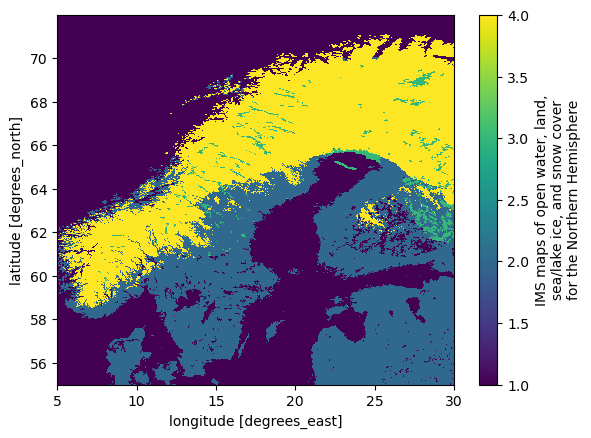

In [17]:
scandinavia["Band1"].plot()

In [22]:
regrid = xr.open_dataset("regridded_output_CW.nc")


In [23]:
regrid

<xarray.Dataset>
Dimensions:  (lon: 1473, lat: 302)
Coordinates:
  * lon      (lon) float64 -109.6 -109.5 -109.4 -109.3 ... 37.3 37.4 37.5 37.6
  * lat      (lat) float64 86.0 85.9 85.8 85.7 85.6 ... 56.3 56.2 56.1 56.0 55.9
Data variables:
    Band1    (lat, lon) float32 ...
Attributes: (12/55)
    CDI:                          Climate Data Interface version 2.4.4 (https...
    Conventions:                  CF-1.6, ACDD-1.3
    source:                       Analysts at the United States National Ice ...
    GDAL:                         GDAL 3.8.4, released 2024/02/08
    history:                      Fri Jan 31 21:59:01 2025: cdo remapbil,../C...
    acknowledgment:               Produced at USNIC with support from NOAA NE...
    ...                           ...
    time_coverage_start:          2015-04-30T00:00:00Z
    title:                        NOAA/NESDIS Interactive Multisensor Snow an...
    GDAL_NETCDF_DIM_EXTRA:        {time}
    GDAL_NETCDF_DIM_time_DEF:     [ 1 11]
    GDAL_NETCDF_DIM_time_VALUES:  1430438400
    CDO:                          Climate Data Operators version 2.4.4 (https...

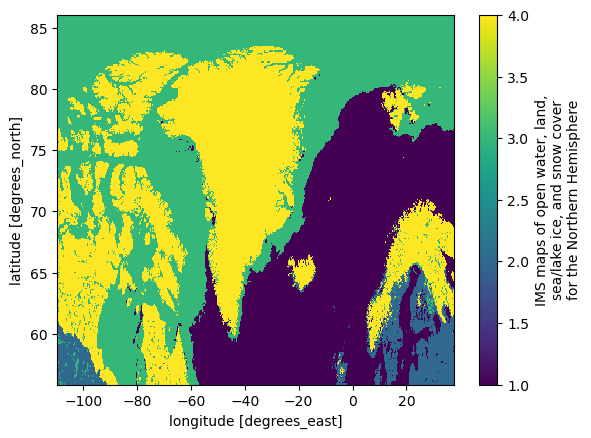

In [24]:
regrid["Band1"].plot()

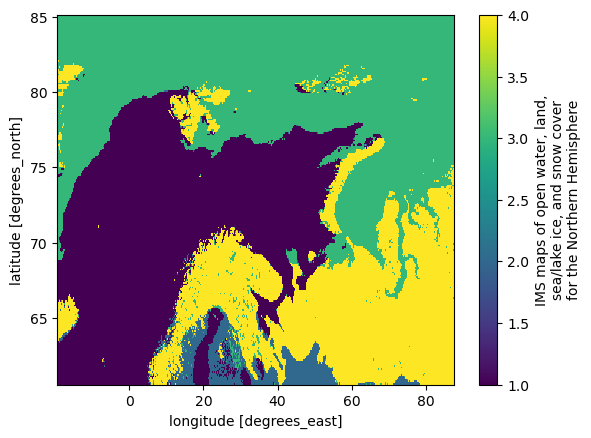

In [25]:
regrid = xr.open_dataset("regridded_output_CE.nc")
regrid["Band1"].plot()


In [29]:
#import numpy as np
#regrid["bin_snow"] = xr.where(regrid.Band1 == 4, 1, 0).astype(np.int8)


In [30]:
output_file = "bin_snow_IMS_regll_20150501.nc"


In [41]:
# Expand the coordinates with time
import numpy as np

# Open the file where the time coordinate is stored
time_file = "ims2015121_1km_v1.3.nc"
time_ds = xr.open_dataset(time_file)

# Extract the time coordinate
time_coord = time_ds['time']

# Open the file where snow_cover is stored
snow_file = "regridded_output_CE.nc"  # Replace with your actual file name
snow_ds = xr.open_dataset(snow_file)
snow_ds = snow_ds.rename({"Band1": "snow_cover"})  


# Define the new variable bin_snow
bin_snow = xr.where(snow_ds.snow_cover == 4, 1, 0).astype(np.int8)

# Add the time dimension to the variables
# Expand dimensions to include time
snow_ds = snow_ds.expand_dims(dim={'time': time_coord})
bin_snow = bin_snow.expand_dims(dim={'time': time_coord})

snow_ds = snow_ds.assign_coords(time=time_coord)

# Add the new variable bin_snow to the dataset
snow_ds['bin_snow'] = bin_snow
snow_ds["time"] = time_coord

# Save the updated dataset to a new NetCDF file
output_file = "updated_snow_file.nc"
snow_ds.to_netcdf(output_file)

